In [185]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import upfirdn
import common
import random

In [186]:
beta = 0.25
span = 6.0
sps  = 6.0
h = common.rcosdesign(beta, span, sps, 'normal')

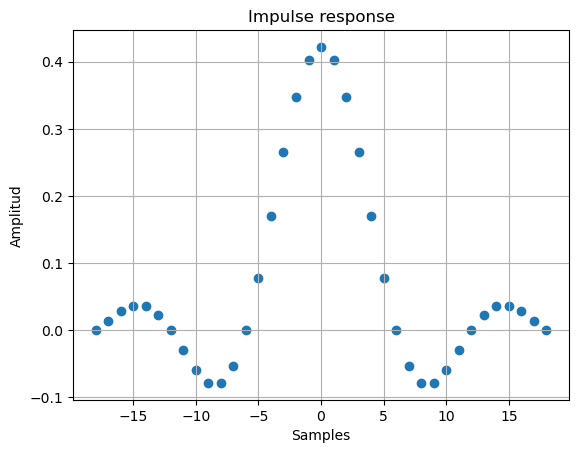

In [187]:
fig = plt.figure()
plt.title('Impulse response')
x_midrange = (span * sps) / 2 
x_range = (span * sps) + 1.0
x = np.linspace(-x_midrange, x_midrange, int(x_range))
plt.scatter(x,h)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

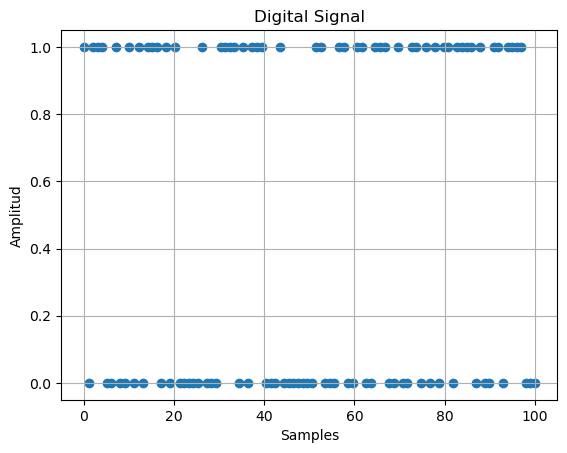

In [225]:

num_d = 100
data_bin_tx = np.random.randint(2, size=num_d).tolist()

fig = plt.figure()
plt.title('Digital Signal')
x = np.linspace(0, num_d, num_d)
plt.scatter(x, data_bin_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

In [ ]:
d_tx = common.code_bpsk(data_bin_tx)

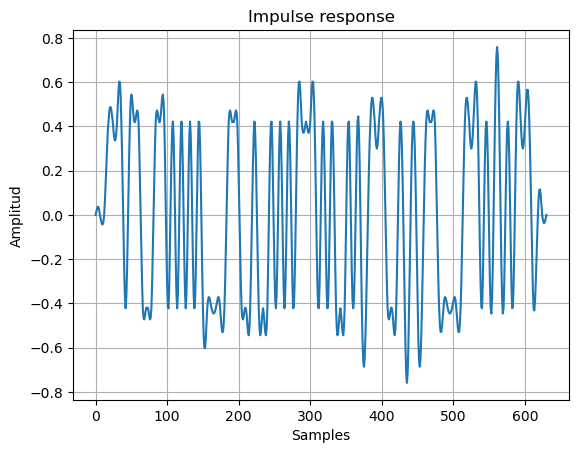

In [189]:
signal =  upfirdn(h, d_tx, up=sps)

fig = plt.figure()
plt.title('Impulse response')
plt.plot(signal)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

In [195]:
target_snr_db = 10
signal_avg_watts = np.mean(signal)
signal_avg_db = 10 * np.log10(signal_avg_watts)


noise_avg_db = signal_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(signal))

signal_noise = signal + noise_volts


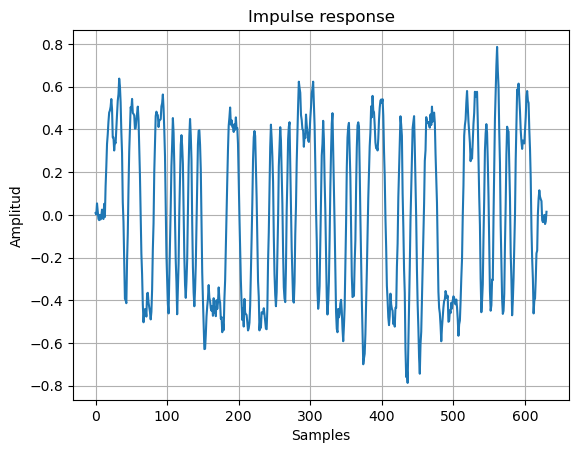

In [196]:
fig = plt.figure()
plt.title('Impulse response')
plt.plot(signal_noise)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

100


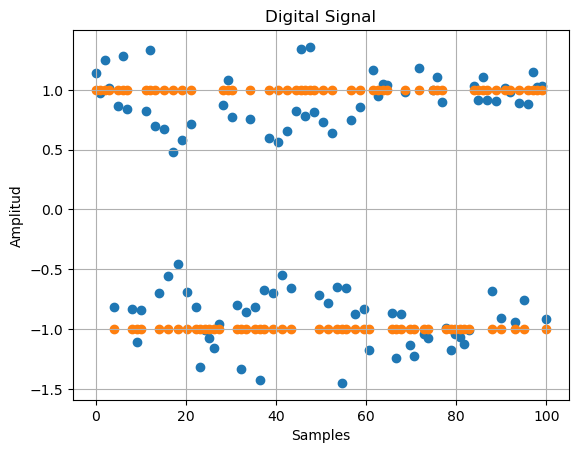

In [197]:
p1 = int(sps)
p2 = int(sps+num_d)

d_rx = upfirdn(h, signal_noise, down=sps)[p1:p2]
num_d= len(d_rx)
print(num_d)
fig = plt.figure()
plt.title('Digital Signal')
x = np.linspace(0, num_d, num_d)
plt.scatter(x, d_rx)
plt.scatter(x, d_tx)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

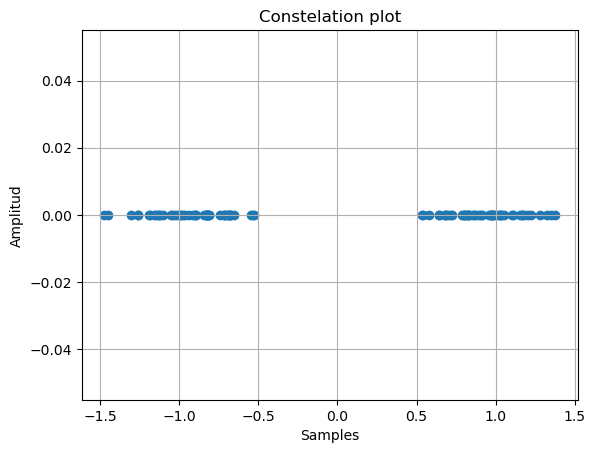

In [194]:
d_rx_const = d_rx + 1j * 0 
fig = plt.figure()
plt.title('Constelation plot')
plt.scatter(np.real(d_rx_const),np.imag(d_rx_const))
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.show()

In [228]:
a = np.sqrt(2)*(1+1j)/2
a = a.real

(0.7071067811865476+0.7071067811865476j)